In [59]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [12]:
data = pd.read_csv('water.csv')

In [22]:
X = data.drop(columns='Potability')
y = data.loc[:,'Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Dokładność modelu: {accuracy:.2%}!')

In [33]:
def rysuj_wykresy(history, metric='accuracy'):
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'], label='Zestaw treningowy')
    plt.plot(history.history['val_loss'], label='zestaw walidacyjny')
    plt.xlabel('Epoki')
    plt.ylabel('Wartosc funkcji straty')
    plt.title('zaleznosc funkcji straty od ilosci epok')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(history.history[metric], label='Zestaw treningowy')
    plt.plot(history.history['val_'+metric], label='zestaw walidacyjny')
    plt.xlabel('Epoki')
    plt.ylabel('dokladnosc')
    plt.title('zaleznosc dokladnosci od ilosci epok')
    plt.legend()

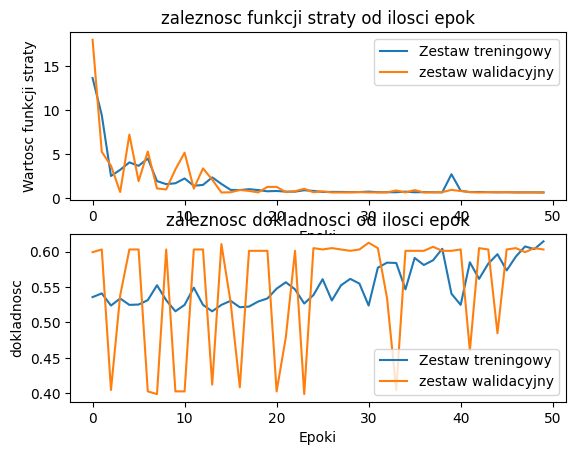

In [51]:
rysuj_wykresy(history)

21/21 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6372
dokladnosc modelu 63.72%


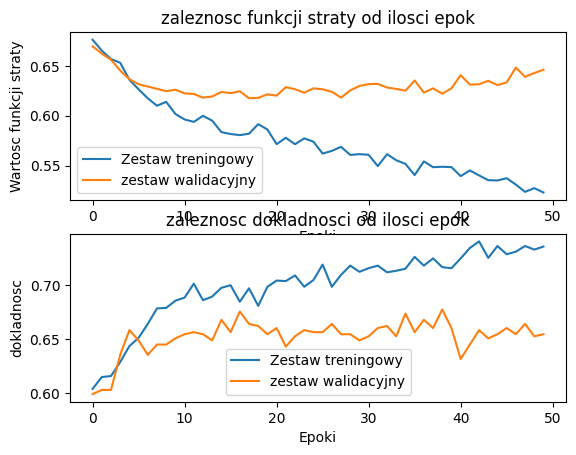

In [57]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

rysuj_wykresy(history)

loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'dokladnosc modelu {acc:.2%}')

21/21 [==============================] - 0s 1ms/step - loss: 0.6510 - accuracy: 0.6616
dokladnosc modelu 66.16%


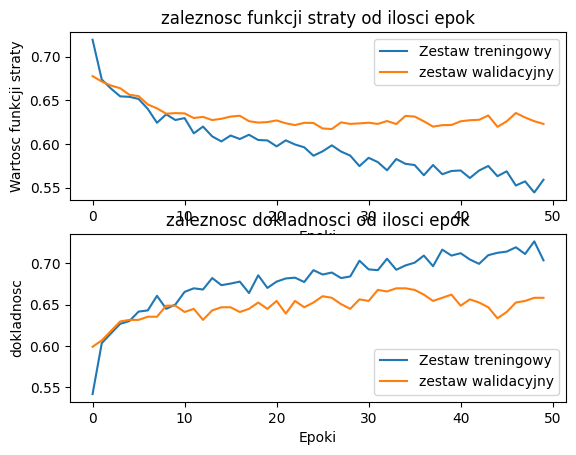

In [60]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

rysuj_wykresy(history)

loss, acc = model.evaluate(X_test_scaled, y_test)
print(f'dokladnosc modelu {acc:.2%}')